In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Read data and descrptive analysis

In [2]:
df = pd.read_csv('palm_ffb.csv')
df.head()

,Date,SoilMoisture,Average_Temp,Min_Temp,Max_Temp,Precipitation,Working_days,HA_Harvested,FFB_Yield
0,01.01.2008,616.4,25.306452,21.3,32.2,184.4,25,777778.3951,1.62
1,01.02.2008,568.9,26.165517,20.9,35.1,140.2,23,767988.2759,1.45
2,01.03.2008,577.6,25.448387,21.3,32.9,280.4,25,783951.9231,1.56
3,01.04.2008,581.1,26.903333,20.6,34.8,173.3,25,788987.0504,1.39
4,01.05.2008,545.4,27.241935,20.9,35.0,140.6,25,813659.7222,1.44


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           130 non-null    object 
 1   SoilMoisture   130 non-null    float64
 2   Average_Temp   130 non-null    float64
 3   Min_Temp       130 non-null    float64
 4   Max_Temp       130 non-null    float64
 5   Precipitation  130 non-null    float64
 6   Working_days   130 non-null    int64  
 7   HA_Harvested   130 non-null    float64
 8   FFB_Yield      130 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 9.3+ KB


In [4]:
df.isnull().sum()

Date             0
SoilMoisture     0
Average_Temp     0
Min_Temp         0
Max_Temp         0
Precipitation    0
Working_days     0
HA_Harvested     0
FFB_Yield        0
dtype: int64

In [5]:
df.describe()

,SoilMoisture,Average_Temp,Min_Temp,Max_Temp,Precipitation,Working_days,HA_Harvested,FFB_Yield
count,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000
mean,527.646923,26.849918,21.379231,33.851538,188.980769,24.753846,793404.491565,1.602231
std,57.367844,0.651413,0.688971,1.079638,80.237210,1.239289,34440.893854,0.281751
min,380.700000,25.158065,18.900000,31.100000,2.000000,21.000000,683431.944400,1.080000
25%,488.625000,26.442285,21.000000,33.100000,140.300000,24.000000,768966.949100,1.390000
50%,538.300000,26.930645,21.500000,33.900000,182.150000,25.000000,790036.158050,1.585000
75%,571.025000,27.270726,21.800000,34.600000,226.100000,26.000000,821989.235250,1.807500
max,647.300000,28.580000,22.600000,36.000000,496.100000,27.000000,882254.225400,2.270000


## Summary
- No missing values
- The variance/std in SoilMositure, Precipitation, HA_Harvested are bigger

# Distribution of each variables (except discrete variable)

/tmp/ipykernel_78398/4104694070.py:5: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  df.hist(ax = ax)


Text(0.04, 0.5, 'Count')

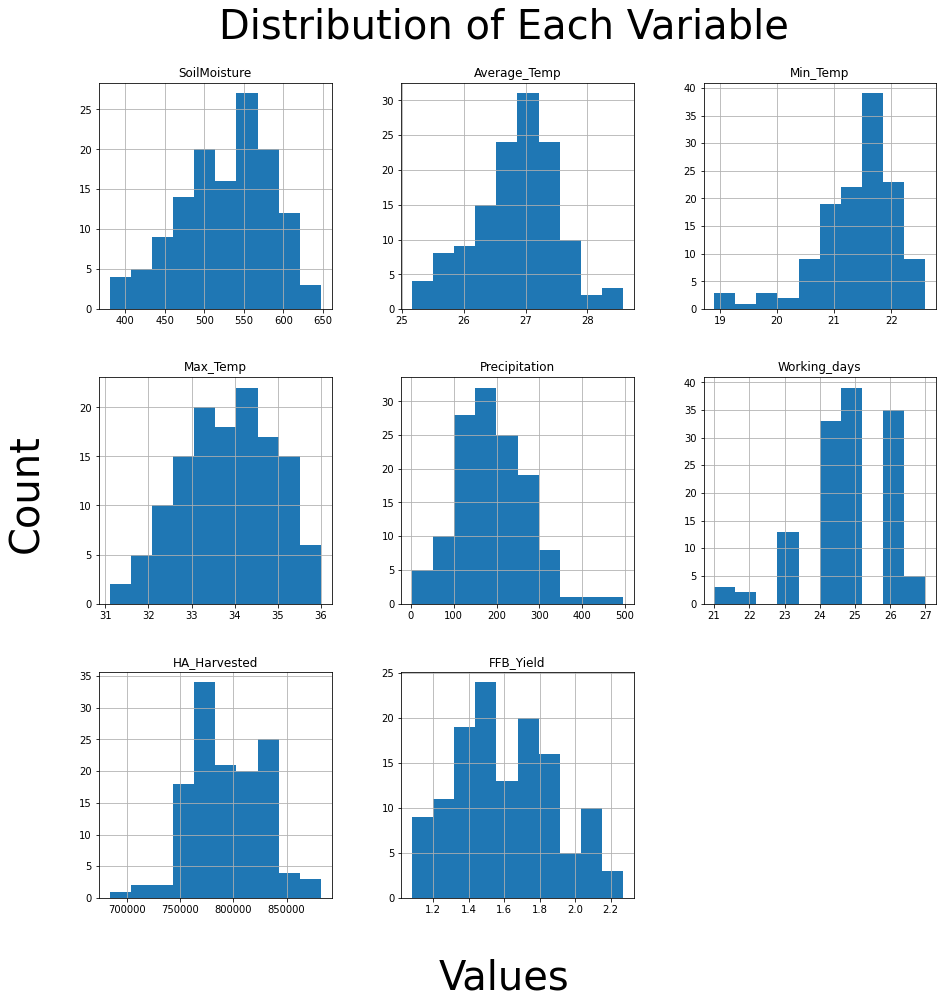

In [6]:
df_copy = df.copy()
df_copy = df_copy[['SoilMoisture','Average_Temp','Min_Temp','Max_Temp','Precipitation','HA_Harvested','FFB_Yield']]
fig = plt.figure(figsize = (15,15))
ax = fig.gca()
df.hist(ax = ax)
plt.suptitle('Distribution of Each Variable', x=0.5, y=0.95, ha='center', fontsize=40)
fig.text(0.5, 0.04, 'Values', ha='center',fontsize=40)
fig.text(0.04, 0.5, 'Count', va='center', rotation='vertical',fontsize=40)

## Summary 
- Min Temp is slight skewed to the left

# Analysis of Discrete Variable (Working Day against Yield)

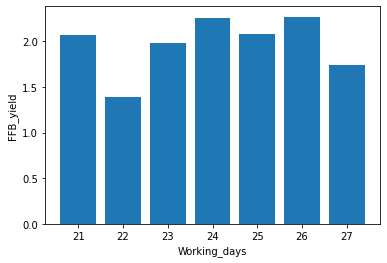

In [8]:
x = df['Working_days']
y = df['FFB_Yield']
plt.bar(x,y)
plt.xlabel('Working_days')
plt.ylabel('FFB_yield')
plt.show()

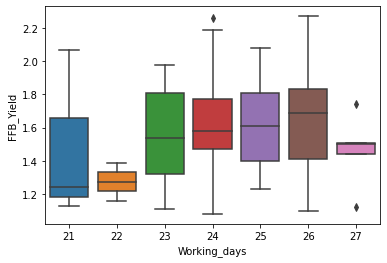

In [13]:
sns.boxplot(data=df, x="Working_days", y="FFB_Yield")

## Summary
- The FFB yield increases as the working days increases
- Boxplot further proves this hypothesis, as the median of FFB yield increases when working days increase.
- The optimal working days to obtain maximum FFB yield is 26, since both plots show decline in FFB yield when the working days is 27 

# Correlation analysis

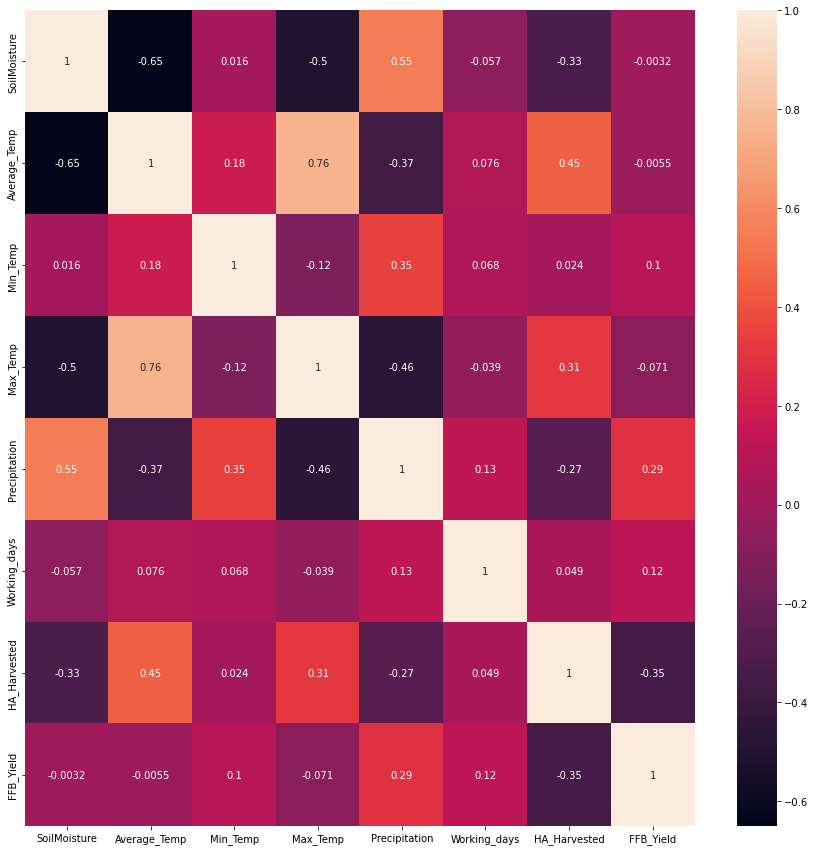

In [30]:
plt.figure(figsize = (15,15))
ax = sns.heatmap(df.corr(), annot=True)

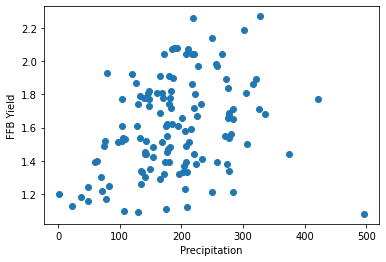

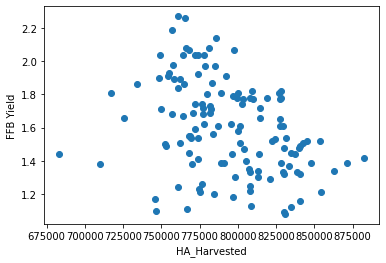

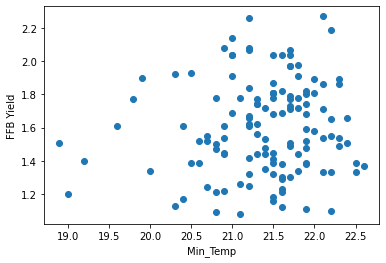

In [38]:
plt.scatter(df['Precipitation'],df['FFB_Yield'])
plt.xlabel('Precipitation')
plt.ylabel('FFB Yield')
plt.show()

plt.scatter(df['HA_Harvested'],df['FFB_Yield'])
plt.xlabel('HA_Harvested')
plt.ylabel('FFB Yield')
plt.show()

plt.scatter(df['Min_Temp'],df['FFB_Yield'])
plt.xlabel('Min_Temp')
plt.ylabel('FFB Yield')
plt.show()

## Summary 
- Preciptation shows strong positive correlation with FFB yield, while min temp and working days show slight postive correlation with FFB yield
- HA_harvested shows strong negative correlation with FFB yield
- Soil moisture shows strong positive correlation with Preciptation
- Max temp shows strong postivie correlation with average temp is reasonable, since the higher the temperature, the giher the average temperature
- Max temp shows strong negative correlation with soil moisture is logical, as the soil mositure will decrease when temprature increase
- Here we focus on preciptation, temperature variables, working days, soil moisture and HA_harvested because they are the one correlated to FFB yield

# Feature selection

In [41]:
from sklearn.ensemble import RandomForestRegressor
x = df[['SoilMoisture','Average_Temp','Min_Temp','Max_Temp','Precipitation','Working_days','HA_Harvested']]
y = df['FFB_Yield']
rf = rf = RandomForestRegressor()
rf.fit(x, y)
rf.feature_importances_

array([0.11385468, 0.1372815 , 0.06308321, 0.08773113, 0.23635187,
       0.02961349, 0.33208412])

<BarContainer object of 7 artists>

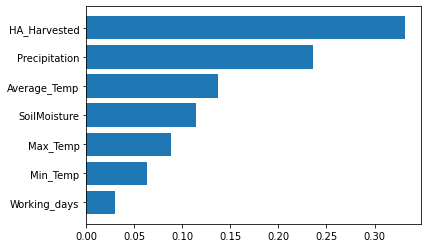

In [44]:
sorted_idx = rf.feature_importances_.argsort()
plt.barh(x.columns[sorted_idx], rf.feature_importances_[sorted_idx])

# Conclusion
- From both correlation analysis and feature selections, we can conclude that HA_Harvested and Preipitation has highest impact on FFB yield
- Temperature variables has slight impact on the FFB yield, together with soil moisture, since both of them are correlated to each other
- Althogh working days seem to have impact on FFB yield at first, but the following analysis show it doesn't have impact on FFB yield